In [1]:
from pathlib import Path
import itertools

import numpy as np

import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt

from matplotlib import rcParams

import highlight_text as ht

import themepy
paper_path = Path('../paper/figures/')
slide_path = Path('../slides/figures/math/')
proposal_path = Path('../draft/figures/math/')

theme = themepy.Theme('paper')
rcParams['font.family'] = 'Segoe Print'
rcParams['figure.dpi'] = 200
%matplotlib inline

In [2]:
nu = [('storm', '⛈️', 'full', '🌂'),
      ('lightning', '🌩️', 'half', '🌂'),
      ('rain', '🌧️', 'half', '☔'),
      ('clouds', '☁️', 'none', '🌂'),
      ('sun', '⛅', 'none', '⛱️')]
nu_color ={'storm': 'slategrey',
 'lightning': 'indigo',
 'rain': 'darkblue',
 'clouds': 'yellowgreen',
 'sun': 'orange'}
fcolor = '#E30B5C' #raspberry
mcolor = '#DD94AF'
ncolor = 'C4'

In [18]:
def make_graph(ax, graph, flag=None, color = 'k', fcolor='red', ms=10):
    flag = [] if flag is None else flag
    for (bottom, top) in graph:
        source = bottom[0], bottom[1]
        target = top[0], top[1]
        e = mpatches.FancyArrowPatch(source, target, arrowstyle='simple', zorder=-10, transform=ax.transData, 
                                     color=color, mutation_scale=ms)
        ax.add_patch(e)
    for (bottom, top) in flag:
        source = bottom[0], bottom[1]
        target = top[0], top[1]
        e = mpatches.FancyArrowPatch(source, target,arrowstyle='simple', zorder=-10, transform=ax.transData,
                                     mutation_scale=ms+15, color=fcolor, edgecolor='k')
        ax.add_patch(e)
        
def hasse_full(ax, nu, graph, flag=None, text_kw=None, ms=7, fcolor=None, color=None):
    flag = [] if flag is None else flag
    text_kw = {} if text_kw is None else text_kw
    for key in nu:
        x, y = nu[key]
        ax.text(x, y, key, **text_kw)
    make_graph(ax, graph, flag, ms=ms, fcolor=fcolor, color=color)
    return

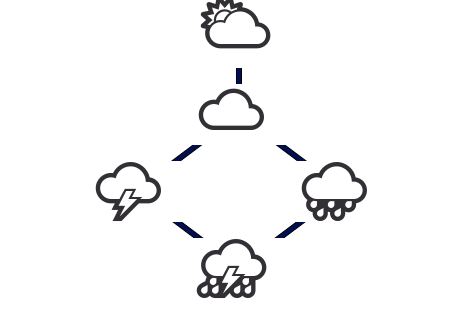

In [66]:
fig, ax = plt.subplots(figsize=(6,6))
bg, cg, tg = np.array([.1, .5, .9]) 
lg, m1g, m2g, rg = np.array([0, .3, .6, .9])
text_kwf = {'fontsize':62, 'fontfamily':'Segoe UI Emoji', 'ha':'center', 'va':'center', 
            'bbox':{'facecolor':'white', 'pad':0, 'edgecolor':'white'}}
xp = .135
p = {'⛈️': (cg+xp, lg), '🌩️':(bg+xp, m1g),  '🌧️':(tg+xp, m1g),'☁️':(cg+xp, m2g), '⛅':(cg-.015, rg)}

ytp = 0

g =[[(cg, lg+ytp), (bg, m1g)], 
    [(cg, lg+ytp), (tg, m1g)], 
    [(tg, m1g+ytp), (cg, m2g)], 
    [(bg, m1g+ytp), (cg, m2g)],
    [(cg, m2g+ytp), (cg, rg)]]

hasse_full(ax, p, g, text_kw=text_kwf, ms=25)
ax.axis('off')
ax.set_aspect('equal')
ax.set(xlim=(-.4, .9), ylim=(-.2, .8), facecolor="white")
fig.savefig(slide_path/"graph.png", bbox_inches='tight', facecolor="white")
fig.savefig(proposal_path/"graph.png", bbox_inches='tight', facecolor='white',)

<ipython-input-18-971aa683af3d>:12: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  e = mpatches.FancyArrowPatch(source, target,arrowstyle='simple', zorder=-10, transform=ax.transData,


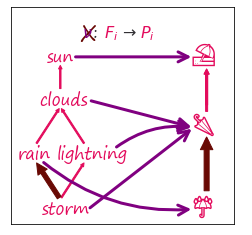

In [20]:
fontsize=16 

error = '#690904'

fig, axd = plt.subplot_mosaic([['invalid']], figsize=(4,4), 
                              gridspec_kw={'wspace':0, 'hspace':0})


r, c, l = np.array([.0, .15, .3]) + .05
b, m1, m2, t = np.array([.1, .35, .6, .8])-.05
pos_words = {'storm': (c-.01, b), 'lightning':(l-.07, m1), 'rain':(r-.01,m1), 
             'clouds':(c-.025,m2), 'sun':(c+.02, t)}

rg, cg, lg = np.array([.0, .15, .3]) + .15
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])-.05

syp = .065
typ = .01
graph = [[(cg,bg+syp), (lg,m1g-typ)], 
         [(cg,bg+syp), (rg,m1g-typ)], 
         [(lg,m1g+syp),(cg,m2g-typ)], 
         [(rg,m1g+syp), (cg,m2g-typ)], 
         [(cg,m2g+syp), (cg,tg-typ)]]
for name, ax in axd.items():
    hasse_full(ax, pos_words, [graph[0]] + graph[2:], [graph[1]], color=fcolor, 
               fcolor= error, 
               text_kw={'fontsize':fontsize, 'color':fcolor})


rg, cg, lg = np.array([.0, .15, .3]) + 1.035
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])
mmg = m1g + (m2g-m1g)/2

for name in ['invalid']:
    make_graph(axd[name], [[(cg, mmg+.065), (cg, tg-.077)], [(cg,bg+.075), (cg, mmg-.065)]], color=fcolor)
    umbrella_pos = {'⛱️':(cg, tg), '🌂':(cg,mmg), '☔':(cg, bg)}
    text_kwf = {'fontsize':20, 'fontfamily':'Segoe UI Emoji'}
    for u in umbrella_pos:
        x, y = umbrella_pos[u]
        axd[name].text(x-.1,y-.05, u, **text_kwf, color=fcolor)

    for (source,_, _,target) in nu:
        connectionstyle=None
        sxo, syo = pos_words[source]
        sx, sy = sxo+.16, syo+.02
        txo, tyo = umbrella_pos[target]
        tx, ty = txo-.08, tyo-.03
        if source=='clouds':
            sx = sxo+.3
        elif source == 'rain':
            sx = sxo+.15
            sy = syo - .01
            connectionstyle="arc3,rad=.2"
        elif source == 'lightning':
            sx = sxo+.35
            sy = syo+.05
            connectionstyle="arc3,rad=-.2"
        elif source== 'storm':
            if name == 'fixed':
                txo, tyo = umbrella_pos['☔']
                tx, ty = txo-.08, tyo-.03
            sx = sxo+.28

        a =  mpatches.FancyArrowPatch((sx, sy), (tx, ty), transform=axd[name].transData,
                                          connectionstyle=connectionstyle,
                                            mutation_scale=25, lw=3, arrowstyle = '->', color=ncolor)
        axd[name].add_patch(a)

    make_graph(axd[name], [[(cg, mmg+.035), (cg, tg-.077)]], 
               [[(cg,bg+.045), (cg, mmg-.065)]],
                color=fcolor, fcolor=error)

    

labelsize=16

axd['invalid'].set(xlim=(0,1.35), ylim=(0,1), xticks=[], yticks=[], facecolor='white')
axd['invalid'].text(.465, .81, "X", color=error, fontsize=labelsize+5, ha='center', va='bottom', 
                    transform=axd['invalid'].transData)
ht.fig_text(x = .5, y = .82, 
        s=r"<$\nu$>: <$F_i$>$\rightarrow$ <$P_i$>", 
            fontsize=labelsize, ha='center',
        highlight_textprops=[{"color": ncolor},
                             {"color": fcolor},
                             {"color": fcolor}],
        ax=axd['invalid'])
fontsize=16
for ppath in [slide_path, paper_path, proposal_path]:
    fig.savefig(ppath/"partial_invalid.png", bbox_inches='tight', facecolor='white' )

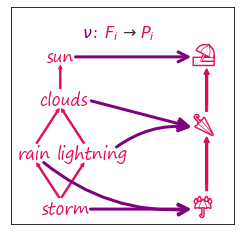

In [21]:
fontsize=16 

fig, axd = plt.subplot_mosaic([['fixed']], figsize=(4,4), 
                              gridspec_kw={'wspace':0, 'hspace':0})


r, c, l = np.array([.0, .15, .3]) + .05
b, m1, m2, t = np.array([.1, .35, .6, .8])-.05
pos_words = {'storm': (c-.01, b), 'lightning':(l-.07, m1), 'rain':(r-.01,m1), 
             'clouds':(c-.025,m2), 'sun':(c+.02, t)}

rg, cg, lg = np.array([.0, .15, .3]) + .15
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])-.05

syp = .065
typ = .01
graph = [[(cg,bg+syp), (lg,m1g-typ)], 
         [(cg,bg+syp), (rg,m1g-typ)], 
         [(lg,m1g+syp),(cg,m2g-typ)], 
         [(rg,m1g+syp), (cg,m2g-typ)], 
         [(cg,m2g+syp), (cg,tg-typ)]]
for name, ax in axd.items():
    hasse_full(ax, pos_words, graph, color=fcolor, text_kw={'fontsize':fontsize, 'color':fcolor})


rg, cg, lg = np.array([.0, .15, .3]) + 1.035
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])
mmg = m1g + (m2g-m1g)/2

for name in ['fixed']:
    make_graph(axd[name], [[(cg, mmg+.065), (cg, tg-.077)], [(cg,bg+.075), (cg, mmg-.065)]])
    umbrella_pos = {'⛱️':(cg, tg), '🌂':(cg,mmg), '☔':(cg, bg)}
    text_kwf = {'fontsize':20, 'fontfamily':'Segoe UI Emoji'}
    for u in umbrella_pos:
        x, y = umbrella_pos[u]
        axd[name].text(x-.1,y-.05, u, **text_kwf, color=fcolor)

    for (source,_, _,target) in nu:
        connectionstyle=None
        sxo, syo = pos_words[source]
        sx, sy = sxo+.16, syo+.02
        txo, tyo = umbrella_pos[target]
        tx, ty = txo-.08, tyo-.03
        if source=='clouds':
            sx = sxo+.3
        elif source == 'rain':
            sx = sxo+.15
            sy = syo - .01
            connectionstyle="arc3,rad=.2"
        elif source == 'lightning':
            sx = sxo+.35
            sy = syo+.05
            connectionstyle="arc3,rad=-.2"
        elif source== 'storm':
            if name == 'fixed':
                txo, tyo = umbrella_pos['☔']
                tx, ty = txo-.08, tyo-.03
            sx = sxo+.28
        a =  mpatches.FancyArrowPatch((sx, sy), (tx, ty), transform=axd[name].transData,
                                          connectionstyle=connectionstyle,
                                            mutation_scale=25, lw=3, arrowstyle = '->', color=ncolor)
        axd[name].add_patch(a)

    flag = [[(cg+.05, mmg-.075), (cg+.05,bg+.035)]] if name =='invalid' else None
    make_graph(axd[name], [[(cg, mmg+.035), (cg, tg-.077)], [(cg,bg+.045), (cg, mmg-.065)]], 
               flag, color=fcolor)

    

labelsize=16

#axd['fixed'].set_title(r"$\nu: F_i \rightarrow V_i$", fontsize=labelsize, y=.87 )

ht.fig_text(x = .5, y = .82, 
        s=r"<$\nu$>: <$F_i$>$\rightarrow$ <$P_i$>", 
            fontsize=labelsize, ha='center',
        highlight_textprops=[{"color": ncolor},
                             {"color": fcolor},
                             {"color": fcolor}],
        ax=axd['fixed'])
axd['fixed'].set(xlim=(0,1.35), ylim=(0,1), xticks=[], yticks=[], facecolor='white')

fontsize=16
fig.savefig(slide_path/"partial_fixed.png", bbox_inches='tight', facecolor='white' )
fig.savefig(paper_path/"partial_fixed.png", bbox_inches='tight', facecolor='white' )
fig.savefig(proposal_path/"partial_fixed.png", bbox_inches='tight', facecolor='white' )

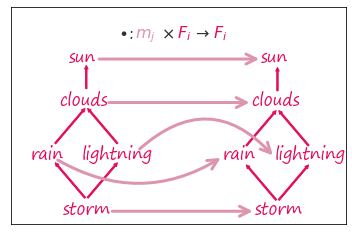

In [34]:
fontsize=16 
fig, axd = plt.subplot_mosaic([['total']], figsize=(6,4))


r, c, l = np.array([.0, .15, .3]) + .05
b, m1, m2, t = np.array([.1, .35, .6, .8])-.05
pos_words = {'storm': (c-.01, b), 'lightning':(l-.07, m1), 'rain':(r-.01,m1), 
             'clouds':(c-.025,m2), 'sun':(c+.02, t)}

rg, cg, lg = np.array([.0, .15, .3]) + .15
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])-.05

syp = .065
typ = .01
graph = [[(cg,bg+syp), (lg,m1g-typ)], 
         [(cg,bg+syp), (rg,m1g-typ)], 
         [(lg,m1g+syp),(cg,m2g-typ)], 
         [(rg,m1g+syp), (cg,m2g-typ)], 
         [(cg,m2g+syp), (cg,tg-typ)]]

hasse_full(axd['total'], pos_words, graph, color=fcolor,text_kw={'fontsize':fontsize, 'color':fcolor})

r, c, l = np.array([.0, .15, .3]) + .94
b, m1, m2, t = np.array([.1, .35, .6, .8])-.05
pos_words2 = {'storm': (c-.01, b), 'lightning':(l-.07, m1), 'rain':(r-.01,m1), 
             'clouds':(c-.025,m2), 'sun':(c+.02, t)}

rg, cg, lg = np.array([.0, .15, .3]) + 1.035
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])-.06

syp = .065
typ = .01
graph = [[(cg,bg+syp), (lg,m1g-typ)], 
         [(cg,bg+syp), (rg,m1g-typ)], 
         [(lg,m1g+syp),(cg,m2g-typ)], 
         [(rg,m1g+syp), (cg,m2g-typ)], 
         [(cg,m2g+syp), (cg,tg-typ)]]

hasse_full(axd['total'], pos_words2, graph, color=fcolor,text_kw={'fontsize':fontsize, 'color':fcolor})

for (source, target) in zip(pos_words,pos_words):
    connectionstyle=None
    sxo, syo = pos_words[source]
    sx, sy = sxo+.13, syo+.01
    txo, tyo = pos_words2[target]
    tx, ty = txo, tyo+.01
    if source=='clouds':
        sx = sxo+.22
    elif source == 'rain':
        sx = sxo+.12
        sy = syo
        connectionstyle="arc3,rad=.3"
    elif source == 'lightning':
        sx = sxo + .26
        sy = syo +.04
        connectionstyle="arc3,rad=-.5"
    elif source== 'storm':
        sx = sxo + .22

    a =  mpatches.FancyArrowPatch((sx, sy), (tx, ty), transform=axd['total'].transData,
                                          connectionstyle=connectionstyle,
                                            mutation_scale=25, lw=3, arrowstyle = '->', color=mcolor)

    axd['total'].add_patch(a)


labelsize=16
#axd['total'].set_title(r"$\bullet: m_j \times F_i \rightarrow F_i$", fontsize=labelsize, y=.87)

ht.fig_text(x = .5, y = .82, 
        s=r"$\bullet$: <$m_j$> $\times$ <$F_i$>$\rightarrow$ <$F_i$>", 
            fontsize=labelsize, ha='center',
        highlight_textprops=[{"color": mcolor},
                             {"color": fcolor},
                             {"color": fcolor}],
        ax=axd['total'])
axd['total'].set(xlim=(-0.05,1.5), ylim=(0,1), xticks=[], yticks=[], facecolor='white')

fontsize=16
fig.savefig(proposal_path/"monoid_total.png", bbox_inches='tight', facecolor='white')

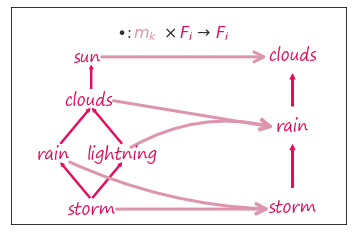

In [36]:
fontsize=16 

fig, axd = plt.subplot_mosaic([['partial']], figsize=(6,4), 
                              gridspec_kw={'wspace':0, 'hspace':0})


r, c, l = np.array([.0, .15, .3]) + .05
b, m1, m2, t = np.array([.1, .35, .6, .8])-.05
pos_words = {'storm': (c-.01, b), 'lightning':(l-.07, m1), 'rain':(r-.01,m1), 
             'clouds':(c-.025,m2), 'sun':(c+.02, t)}

rg, cg, lg = np.array([.0, .15, .3]) + .15
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])-.05

syp = .065
typ = .01
graph = [[(cg,bg+syp), (lg,m1g-typ)], 
         [(cg,bg+syp), (rg,m1g-typ)], 
         [(lg,m1g+syp),(cg,m2g-typ)], 
         [(rg,m1g+syp), (cg,m2g-typ)], 
         [(cg,m2g+syp), (cg,tg-typ)]]


hasse_full(axd['partial'], pos_words, graph,  color=fcolor, 
           text_kw={'fontsize':fontsize, 'color':fcolor})

    
rg, cg, lg = np.array([.0, .15, .3]) + 1.2
bg, m1g, m2g, tg = np.array([.1, .35, .6, .8])
mmg = m1g + (m2g-m1g)/2
xpad = .1
bypad = .06
typad = .1
make_graph(axd['partial'], [[(cg-xpad,bg+bypad), (cg-xpad, mmg-typad)],
                                [(cg-xpad, mmg+bypad), (cg-xpad, tg-typad)]], color=fcolor)
pos_vis = {'none':(cg, tg), 'half': (cg, mmg), 'full':(cg, bg)}

umbrella_pos = {'⛱️':(cg, tg), '🌂':(cg,mmg), '☔':(cg, bg)}
for u, sym in zip(pos_vis,['clouds', 'rain', 'storm' ]):
    x, y = pos_vis[u]
    axd['partial'].text(x-.1,y-.025, sym, fontsize=labelsize, color=fcolor, ha='center', va='center')
for (source,_, _,target) in nu:
    connectionstyle=None
    sxo, syo = pos_words[source]
    sx, sy = sxo+.12, syo+.02
    txo, tyo = umbrella_pos[target]
    tx, ty = txo-.21, tyo-.03
    if source=='clouds':
        sx = sxo+.22
        tx = txo-.18
    elif source == 'rain':
        sx = sxo+.15
        sy = syo - .01
        tx = txo-.20
        connectionstyle="arc3,rad=.1"
    elif source == 'lightning':
        sx = sxo + .2
        sy = syo+.05
        tx = txo-.18
        connectionstyle="arc3,rad=-.2"
    elif source== 'storm':
        sx = sxo+.22
        txo, tyo = umbrella_pos['☔']
        tx, ty = txo-.2, tyo-.03
    a =  mpatches.FancyArrowPatch((sx, sy), (tx, ty), transform=axd['partial'].transData,
                                          connectionstyle=connectionstyle,
                                            mutation_scale=25, lw=3, arrowstyle = '->', color=mcolor)
    axd['partial'].add_patch(a)


labelsize=16
ht.fig_text(x = .5, y = .82, 
        s=r"$\bullet$: <$m_k$> $\times$ <$F_i$>$\rightarrow$ <$F_i$>", 
            fontsize=labelsize, ha='center',
        highlight_textprops=[{"color": mcolor},
                             {"color": fcolor},
                             {"color": fcolor}],
        ax=axd['partial'])
               
axd['partial'].set(xlim=(-.08,1.5), ylim=(0,1), xticks=[], yticks=[], facecolor='white')

fontsize=16

fig.savefig(proposal_path/"monoid_partial.png", bbox_inches='tight', facecolor='white')